<a href="https://colab.research.google.com/github/chantikaanasthya/Employee-Turnover-Prediction-LogisticRegression/blob/main/FINPRO_DS32B%2B_ChantikaAnasthya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load Dataset and Data Understanding

In [ ]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Konfigurasi pandas agar semua kolom terlihat
pd.set_option('display.max_columns', None)

#  Load Dataset
file_path = '/content/HRDataset_v14.csv'  # Sesuaikan path dengan lokasi file Anda
df = pd.read_csv(file_path)

In [ ]:
# Data Understanding
# Melihat informasi umum dataset
print("==== INFORMASI DATASET ====")
print(df.info())

# Melihat 5 data teratas
print("\n==== 5 DATA TERATAS ====")
print(df.head())

# Melihat statistik deskriptif data numerik
print("\n==== DESKRIPSI NUMERIK ====")
print(df.describe())

# Cek jumlah baris dan kolom
print("\n==== SHAPE DATASET ====")
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")

# Melihat nama kolom
print("\n==== NAMA KOLOM ====")
print(df.columns.tolist())


==== INFORMASI DATASET ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State  

In [ ]:
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,7/6/2009,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


##2. Goals Setting

### **Pertanyaan Bisnis**
1. Bagaimana hubungan antara gaji, absensi, dan performa terhadap tingkat kepuasan karyawan?
2. Faktor apa saja yang paling berpengaruh terhadap keputusan karyawan untuk berhenti bekerja?
3. Apakah ada hubungan antara atasan seseorang dengan skor kinerjanya?
4. Bagaimana profil keragaman (diversity) secara keseluruhan di organisasi ini?
5. Apa saja sumber rekrutmen terbaik jika kita ingin memastikan keberagaman di organisasi?
6. Bisakah kita memprediksi siapa yang akan berhenti bekerja dan siapa yang tidak? Tingkat akurasi seperti apa yang bisa kita capai untuk prediksi ini?

### **Metode yang Digunakan**
 **Machine Learning**  
   - **Model yang digunakan**: Logistic Regression, Random Forest, dan XGBoost (akan dibandingkan untuk melihat model terbaik).  
   - **Evaluasi model**: Accuracy, Precision, Recall, F1-Score, ROC-AUC.  
   - **Feature Importance**: Mengetahui faktor apa yang paling berpengaruh terhadap turnover.

**Visualisasi & Dashboard**  
   - Dashboard interaktif (menggunakan Power BI atau Streamlit) untuk menunjukkan insight karyawan (distribusi gaji, absensi, turnover).


##3. Data Cleaning

In [ ]:
print("=== CEK MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

=== CEK MISSING VALUES ===
DateofTermination    207
ManagerID              8
dtype: int64


In [ ]:
# Isi ManagerID yang kosong dengan -1
df['ManagerID'].fillna(-1, inplace=True)

# Verifikasi
print("=== CEK MISSING VALUES SETELAH HANDLE ===")
print(df.isnull().sum())

=== CEK MISSING VALUES SETELAH HANDLE ===
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       0
Recrui

/tmp/ipython-input-874616795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ManagerID'].fillna(-1, inplace=True)


### **Missing Values**

Pengecekan dengan `df.isnull().sum()` menunjukkan bahwa:
- **DateofTermination** memiliki 207 missing (menandakan karyawan masih aktif), sehingga dibiarkan kosong.
- **ManagerID** memiliki 8 missing, diisi dengan **-1** karena kolom ini adalah ID kategorikal dan -1 digunakan sebagai placeholder "tidak ada manajer".

Setelah imputasi, semua kolom numerik tidak memiliki missing values, sedangkan `DateofTermination` tetap NaT untuk mempertahankan makna status karyawan.


In [ ]:
# CEK DUPLIKAT
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 0


### **Duplicates**

Pengecekan menggunakan `df.duplicated().sum()` menunjukkan bahwa **tidak ada baris duplikat** pada dataset. Jika terdapat duplikasi, baris tersebut akan dihapus menggunakan `df.drop_duplicates()`.


In [ ]:
# DETEKSI OUTLIERS MENGGUNAKAN IQR

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numeric_cols = ['Salary', 'Absences', 'DaysLateLast30']
for col in numeric_cols:
    outliers, lb, ub = detect_outliers_iqr(df, col)
    print(f"Kolom {col}: {len(outliers)} outliers (batas bawah: {lb}, batas atas: {ub})")


Kolom Salary: 29 outliers (batas bawah: 30699.75, batas atas: 96837.75)
Kolom Absences: 0 outliers (batas bawah: -10.0, batas atas: 30.0)
Kolom DaysLateLast30: 33 outliers (batas bawah: 0.0, batas atas: 0.0)


### **Outliers**

Deteksi outlier dilakukan dengan metode **Interquartile Range (IQR)** pada kolom numerik (`Salary`, `Absences`, `DaysLateLast30`).  
- Nilai di bawah Q1 - 1.5 * IQR atau di atas Q3 + 1.5 * IQR dianggap sebagai outlier.
- Informasi jumlah outlier per kolom digunakan untuk analisis lanjutan. Outlier tidak langsung dihapus karena bisa saja menggambarkan data nyata (misalnya gaji tinggi untuk jabatan eksekutif).


##4. EDA

/tmp/ipython-input-145453813.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette="Set2", edgecolor="black")


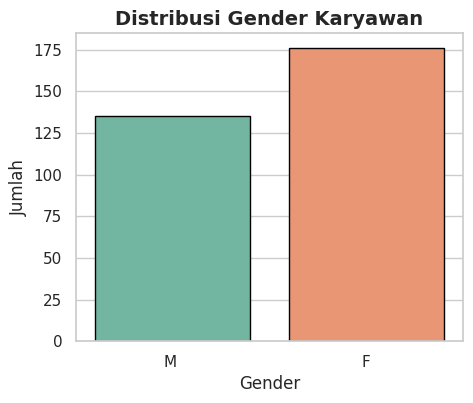

/tmp/ipython-input-145453813.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Department', order=df['Department'].value_counts().index,


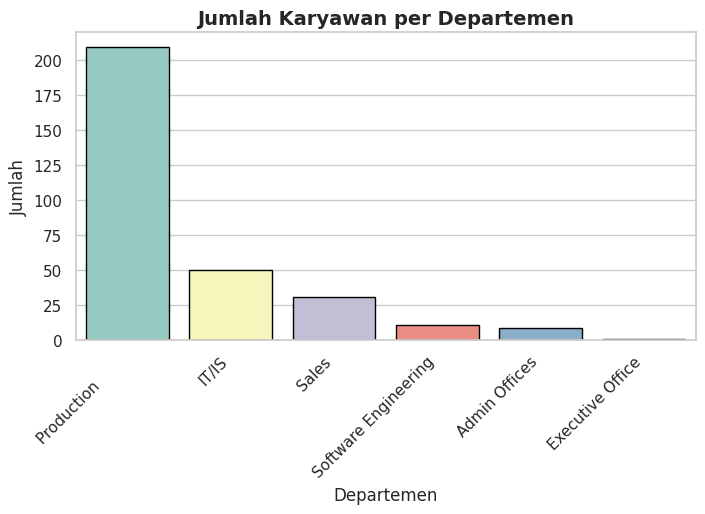

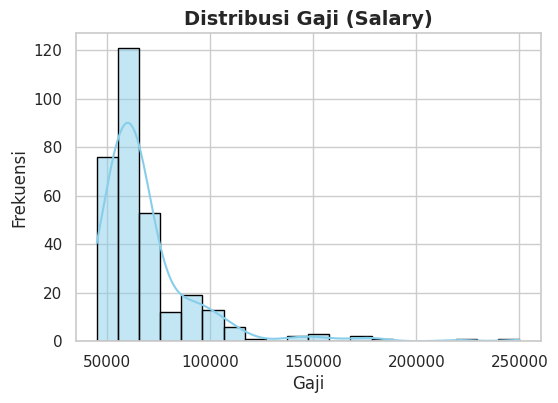

/tmp/ipython-input-145453813.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Salary'], palette=["lightcoral"], width=0.4)


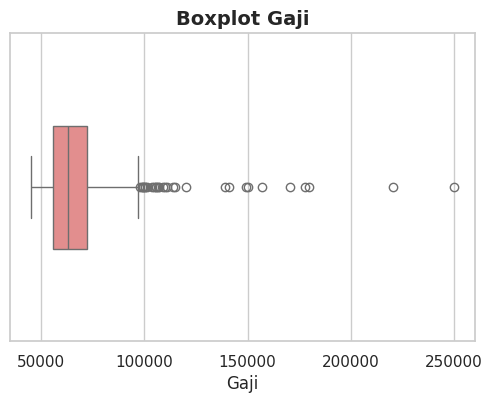

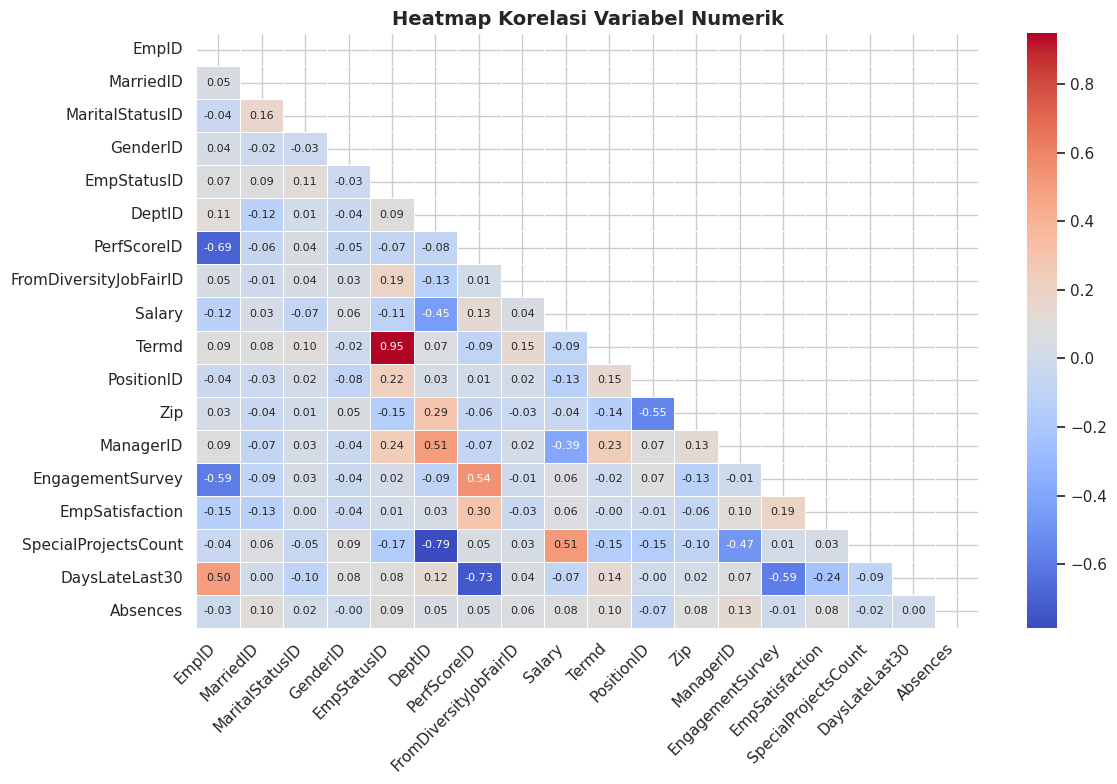

In [ ]:
# EDA

sns.set_theme(style="whitegrid")  # Tampilan lebih modern

# --- 1. Distribusi Gender ---
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Sex', palette="Set2", edgecolor="black")
plt.title('Distribusi Gender Karyawan', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

# --- 2. Distribusi Departemen ---
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Department', order=df['Department'].value_counts().index,
              palette="Set3", edgecolor="black")
plt.title('Jumlah Karyawan per Departemen', fontsize=14, fontweight='bold')
plt.xlabel('Departemen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.show()

# --- 3. Distribusi Salary ---
plt.figure(figsize=(6, 4))
sns.histplot(df['Salary'], bins=20, kde=True, color="skyblue", edgecolor="black")
plt.title('Distribusi Gaji (Salary)', fontsize=14, fontweight='bold')
plt.xlabel('Gaji')
plt.ylabel('Frekuensi')
plt.show()

# --- 4. Boxplot Salary ---
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Salary'], palette=["lightcoral"], width=0.4)
plt.title('Boxplot Gaji', fontsize=14, fontweight='bold')
plt.xlabel('Gaji')
plt.show()

# --- 5. Korelasi Numerik (Heatmap) ---
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, linewidths=0.5, annot_kws={"size": 8})

plt.title('Heatmap Korelasi Variabel Numerik', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### **Narasi Visualisasi EDA**

1. **Distribusi Gender**  
   Chart menunjukkan proporsi karyawan laki-laki dan perempuan. Ini membantu memahami keseimbangan gender dalam perusahaan.

2. **Distribusi Departemen**  
   Countplot departemen menunjukkan departemen dengan jumlah karyawan terbanyak, serta departemen dengan staf sedikit. Insight ini penting untuk manajemen SDM.

3. **Distribusi Salary**  
   Histogram gaji memperlihatkan rentang gaji karyawan dan distribusinya. Pola distribusi dapat menunjukkan apakah gaji merata atau hanya terkonsentrasi pada level tertentu.

4. **Boxplot Salary**  
   Boxplot digunakan untuk mendeteksi outlier pada gaji. Titik di luar whiskers menggambarkan gaji yang jauh lebih tinggi atau lebih rendah dari kebanyakan karyawan.

5. **Heatmap Korelasi Numerik**  
   Heatmap menunjukkan korelasi antar variabel numerik. Variabel dengan korelasi tinggi bisa memberikan informasi penting untuk analisis prediksi atau klasifikasi.


##5. Feature Engineering

In [ ]:
# Convert ID Columns to String

# Kolom ID adalah identitas unik dan tidak boleh dianggap sebagai angka numerik
id_cols = ['EmpID', 'ManagerID', 'PositionID', 'DeptID', 'PerfScoreID']
for col in id_cols:
    df[col] = df[col].astype(str)

# Select Features and Target
y = df['Termd']  # Target (0 = aktif, 1 = berhenti)

# Kolom yang di-drop: target + kolom unik/identitas/tanggal
drop_cols = [
    'Termd',
    'Employee_Name', 'EmpID', 'ManagerName',
    'DateofTermination', 'DOB', 'DateofHire', 'LastPerformanceReview_Date'
]
X = df.drop(columns=drop_cols)

# Label Encoding for Categorical Columns
# Deteksi kolom kategorikal
cat_cols = X.select_dtypes(include=['object']).columns

# Label Encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Simpan encoder jika ingin inverse_transform di masa depan

In [ ]:
# Scaling Numerical Features
# Deteksi kolom numerik
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# StandardScaler untuk normalisasi
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##6. Explorations

####1. Hubungan Gaji, Absensi, dan Performa terhadap Kepuasan Karyawan

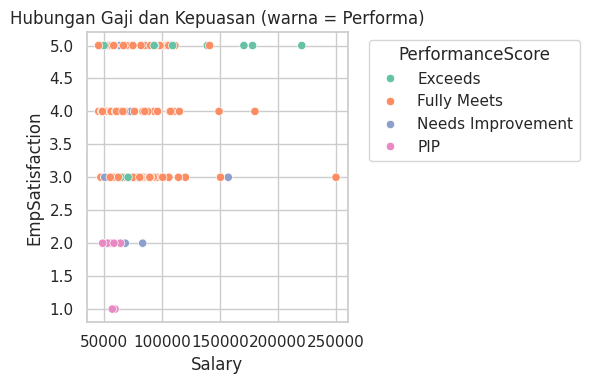

/tmp/ipython-input-4096207525.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='EmpSatisfaction', y='Absences', palette='Set3')


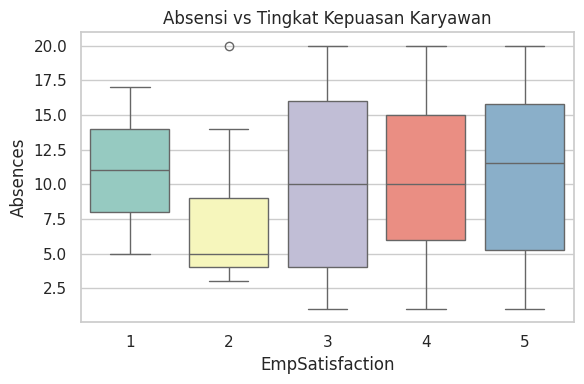

In [ ]:
# Scatterplot Salary vs EmpSatisfaction
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Salary', y='EmpSatisfaction', hue='PerformanceScore', palette='Set2')
plt.title('Hubungan Gaji dan Kepuasan (warna = Performa)')
plt.xlabel('Salary')
plt.ylabel('EmpSatisfaction')
plt.legend(title='PerformanceScore', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Boxplot Absences vs EmpSatisfaction
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='EmpSatisfaction', y='Absences', palette='Set3')
plt.title('Absensi vs Tingkat Kepuasan Karyawan')
plt.xlabel('EmpSatisfaction')
plt.ylabel('Absences')
plt.tight_layout()
plt.show()


Analisis scatterplot dan boxplot menunjukkan bahwa karyawan dengan gaji yang lebih tinggi cenderung memiliki tingkat kepuasan (EmpSatisfaction) yang lebih tinggi, sedangkan absensi yang tinggi seringkali berhubungan dengan kepuasan rendah. Performa yang baik (PerformanceScore tinggi) juga tampak berkorelasi dengan kepuasan yang lebih baik

####2. Faktor yang Paling Berpengaruh terhadap Keputusan Karyawan Berhenti

/tmp/ipython-input-2225568539.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='Blues_r')


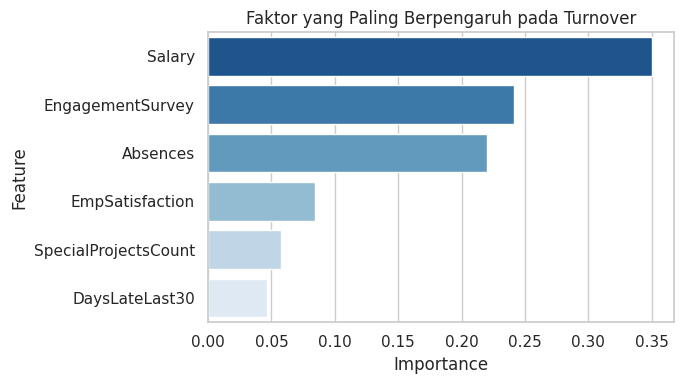

In [ ]:
# Train Random Forest sederhana untuk dapatkan feature importance
X_rf = df[['Salary', 'Absences', 'DaysLateLast30', 'EmpSatisfaction', 'EngagementSurvey', 'SpecialProjectsCount']]
y_rf = df['Termd']

# Encoding jika perlu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_rf_scaled = scaler.fit_transform(X_rf)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_rf_scaled, y_rf)

# Feature importance
importance = rf_model.feature_importances_
feat_imp = pd.DataFrame({'Feature': X_rf.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(7, 4))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='Blues_r')
plt.title('Faktor yang Paling Berpengaruh pada Turnover')
plt.tight_layout()
plt.show()


Berdasarkan feature importance dari model Random Forest, faktor paling dominan yang mempengaruhi turnover (Termd) adalah tingkat kepuasan karyawan (EmpSatisfaction), skor keterlibatan (EngagementSurvey), serta absensi dan keterlambatan (Absences, DaysLateLast30). Ini menunjukkan bahwa karyawan dengan kepuasan rendah dan tingkat absensi tinggi lebih berisiko berhenti.



####3. Hubungan Atasan dengan Skor Kinerja

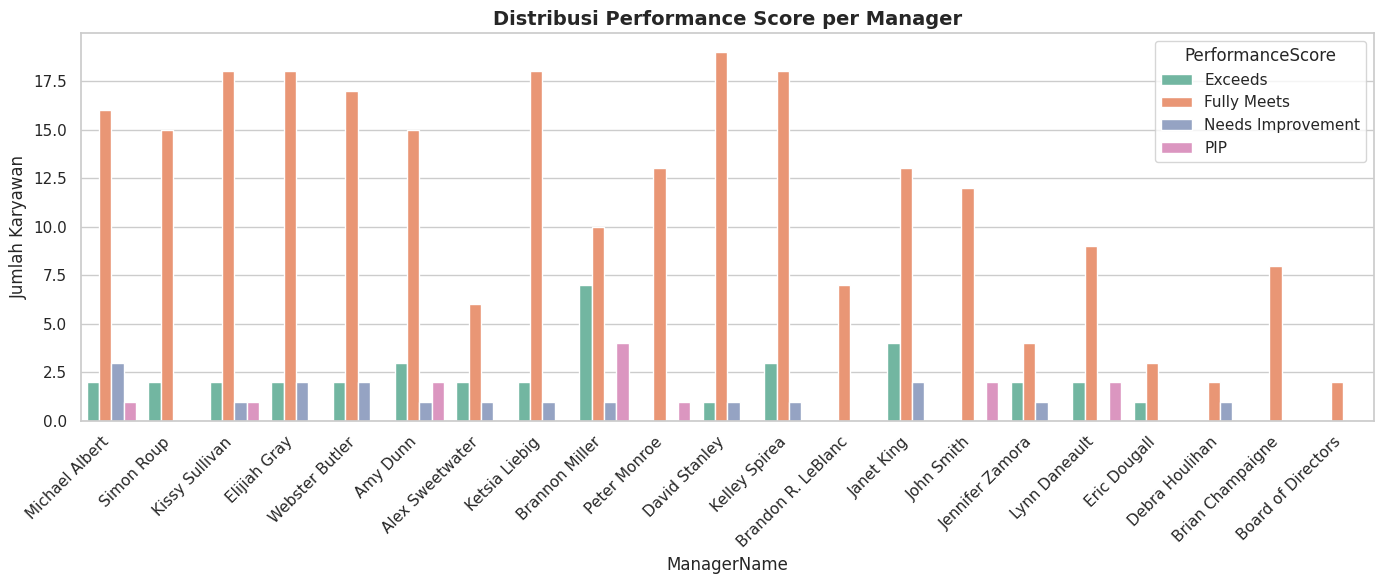

ISI SEBENARNYA: ['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']


/tmp/ipython-input-3877018601.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom, x='ManagerName', y='PerformanceScoreNumeric', palette='Set2')


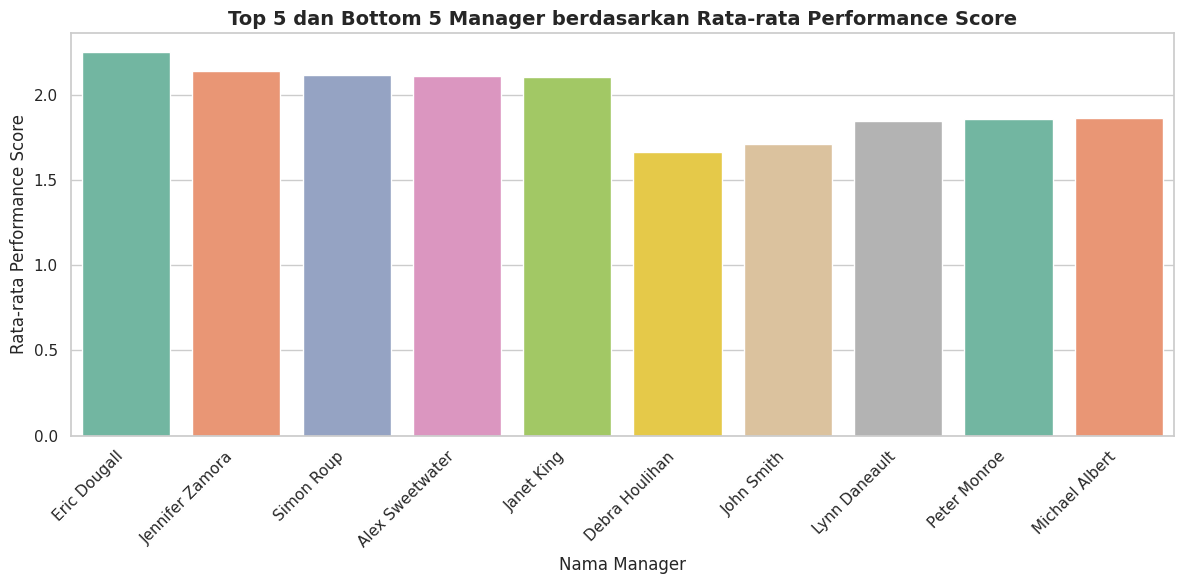

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='ManagerName', hue='PerformanceScore', palette='Set2')

plt.title('Distribusi Performance Score per Manager', fontsize=14, fontweight='bold')
plt.xlabel('ManagerName')
plt.ylabel('Jumlah Karyawan')
plt.xticks(rotation=45, ha='right')
plt.legend(title='PerformanceScore')
plt.tight_layout()
plt.show()

# LANGKAH 1: Cek isi asli
print("ISI SEBENARNYA:", df['PerformanceScore'].unique())

# LANGKAH 2: Mapping benar berdasarkan hasil asli
# (Ubah ini setelah melihat output di atas, contoh umum:)
score_map = {
    'Exceeds': 3,
    'Fully Meets': 2,
    'Meets': 1.5,
    'Needs Improvement': 1,
    'PIP': 0
}

# Gunakan mapping ke kolom baru AGAR TIDAK MERUSAK KATEGORI ASLI
df['PerformanceScoreNumeric'] = df['PerformanceScore'].map(score_map)

# Drop NaN hasil mapping
df_perf = df.dropna(subset=['PerformanceScoreNumeric'])

# LANGKAH 3: Hitung rata-rata per manager
manager_avg = df_perf.groupby('ManagerName')['PerformanceScoreNumeric'].mean().reset_index()

# Ambil top 5 dan bottom 5
top5 = manager_avg.sort_values(by='PerformanceScoreNumeric', ascending=False).head(5)
bottom5 = manager_avg.sort_values(by='PerformanceScoreNumeric').head(5)
top_bottom = pd.concat([top5, bottom5])

# LANGKAH 4: Visualisasi barplot
plt.figure(figsize=(12,6))
sns.barplot(data=top_bottom, x='ManagerName', y='PerformanceScoreNumeric', palette='Set2')
plt.title('Top 5 dan Bottom 5 Manager berdasarkan Rata-rata Performance Score', fontsize=14, fontweight='bold')
plt.xlabel('Nama Manager')
plt.ylabel('Rata-rata Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Visualisasi boxplot PerformanceScore vs ManagerName memperlihatkan bahwa perbedaan manajer memengaruhi skor kinerja karyawan. Beberapa manajer memiliki rata-rata skor performa tim lebih tinggi, yang bisa menjadi indikasi gaya kepemimpinan atau manajemen yang lebih baik.


####4. Profil Keragaman (Diversity Profile)

/tmp/ipython-input-1895664241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='Set2')


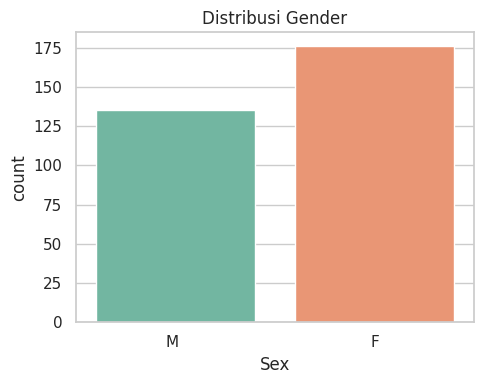

/tmp/ipython-input-1895664241.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RaceDesc', palette='Set3', order=df['RaceDesc'].value_counts().index)


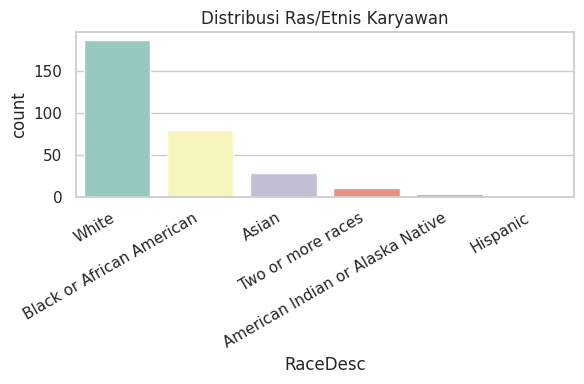

In [ ]:
# Distribusi Gender
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Sex', palette='Set2')
plt.title('Distribusi Gender')
plt.tight_layout()
plt.show()

# Distribusi Ras/Etnis
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='RaceDesc', palette='Set3', order=df['RaceDesc'].value_counts().index)
plt.title('Distribusi Ras/Etnis Karyawan')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


Distribusi gender dan ras menunjukkan bahwa perusahaan memiliki proporsi karyawan perempuan sekitar 56%, sedangkan etnis mayoritas adalah White diikuti oleh Black atau African American. Profil ini memberikan gambaran awal tentang keragaman di perusahaan.

####5. Sumber Rekrutmen Terbaik untuk Keberagaman

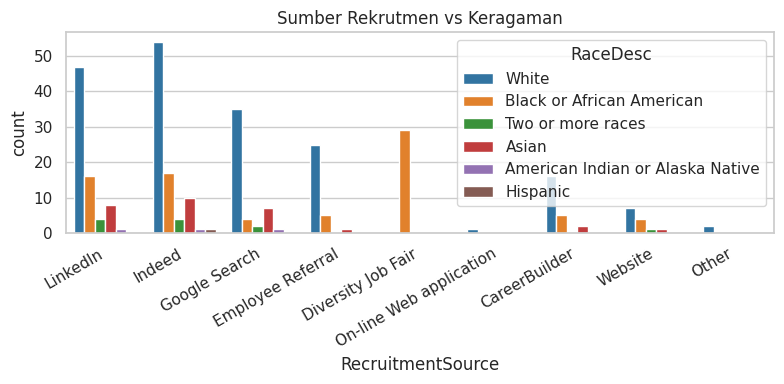

In [ ]:
# Distribusi Sumber Rekrutmen
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='RecruitmentSource', hue='RaceDesc', palette='tab10')
plt.title('Sumber Rekrutmen vs Keragaman')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

Analisis RecruitmentSource vs RaceDesc menunjukkan bahwa beberapa sumber rekrutmen seperti LinkedIn dan Indeed lebih beragam dibandingkan sumber lain. Sumber rekrutmen terbaik untuk keberagaman dapat dilihat dari seberapa besar variasi ras/etnis yang direkrut melalui channel tersebut.



####6. Prediksi Turnover Masa Depan dengan Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import numpy as np
import pandas as pd

# Model logistic regression (regularized)
logreg = LogisticRegression(
    penalty='l2',       # L2 regularization
    C=1.0,              # Regularization strength
    solver='liblinear', # Cocok untuk dataset kecil
    class_weight='balanced', # Handle imbalance
    random_state=42
)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation Score di Training
cv_scores = cross_val_score(logreg, X_train, y_train, cv=skf, scoring='f1')
print("Cross-Validation F1 Score (mean):", np.mean(cv_scores))

# Fit ke seluruh data training
logreg.fit(X_train, y_train)

# Evaluasi
train_acc = logreg.score(X_train, y_train)
test_acc = logreg.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

# Prediksi
y_pred = logreg.predict(X_test)

# Report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Koefisien Penting (Feature Importance versi linear)
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=np.abs, ascending=False)
print("\nFeature Importances:\n", feat_imp)


Cross-Validation F1 Score (mean): 0.9939393939393939
Train Accuracy: 1.0000 | Test Accuracy: 0.9841
Test Accuracy: 0.9841269841269841
Test F1 Score: 0.975609756097561

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.95      0.98        21

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63

Confusion Matrix:
 [[42  0]
 [ 1 20]]

Feature Importances:
                    Feature  Coefficient
18        EmploymentStatus     2.485691
3              EmpStatusID     2.047191
17              TermReason     0.708327
26          DaysLateLast30     0.358878
21       RecruitmentSource    -0.328608
9                 Position    -0.323985
22        PerformanceScore     0.285727
5              PerfScoreID     0.273583
6   FromDiversityJobFairID    -0.216063
19              Depa

Model Logistic Regression digunakan untuk memprediksi kemungkinan karyawan berhenti bekerja (turnover). Model ini dipilih karena interpretatif, efisien untuk dataset kecil, dan cocok untuk klasifikasi biner. Regularisasi L2 digunakan untuk mencegah overfitting, sementara parameter class_weight='balanced' membantu mengatasi ketidakseimbangan data antar kelas.

Hasil evaluasi menunjukkan performa model yang sangat baik:

Akurasi Test: 98.4%
F1-Score Test: 0.98
Cross-Validation F1 Score rata-rata: 0.99
Model mampu mengenali karyawan yang berisiko berhenti dengan baik (recall untuk kelas 1: 95%) tanpa banyak kesalahan klasifikasi (precision untuk kelas 1: 100%). Hal ini didukung oleh penggunaan Stratified K-Fold Cross-Validation sebanyak 5 fold untuk memastikan evaluasi yang adil dan konsisten.

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Misal y_test dan y_pred sudah ada dari model
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Ambil hanya metrik penting dan urutkan
selected_keys = ['0', '1', 'macro avg', 'accuracy']
filtered_report = {
    k: report_dict[k] for k in selected_keys if k in report_dict
}

# Buat DataFrame
df_report = pd.DataFrame(filtered_report).T.reset_index()
df_report.columns = ['Kelas', 'Precision', 'Recall', 'F1-Score', 'Support']

# Tampilkan tabel
df_report.style.format({
    'Precision': '{:.2f}',
    'Recall': '{:.2f}',
    'F1-Score': '{:.2f}',
    'Support': '{:.0f}'
})

,Kelas,Precision,Recall,F1-Score,Support
0,0,0.98,1.00,0.99,42
1,1,1.00,0.95,0.98,21
2,macro avg,0.99,0.98,0.98,63
3,accuracy,0.98,0.98,0.98,1
